# In this Notebook I am going to take a real life image of handwritten text and then try and classify it. 

## This will test my real life accuracy and it will actually tell me if the model is good at classifying. 

#### I would like to know this as I have my own doubts about the model. For example when I was predicting the test set, even though it has seen that data before, it got one of them really wrong. 

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [2]:
reloaded = tf.keras.models.load_model(
      "/Users/puravgupta/Jupyter Notebooks/EMNIST Saved Model")

reloaded.summary()

2022-02-20 20:01:14.931707: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-02-20 20:01:14.931805: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Metal device set to: Apple M1
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooli

In [3]:
reloaded.layers[0].input_shape

(None, 28, 28, 1)

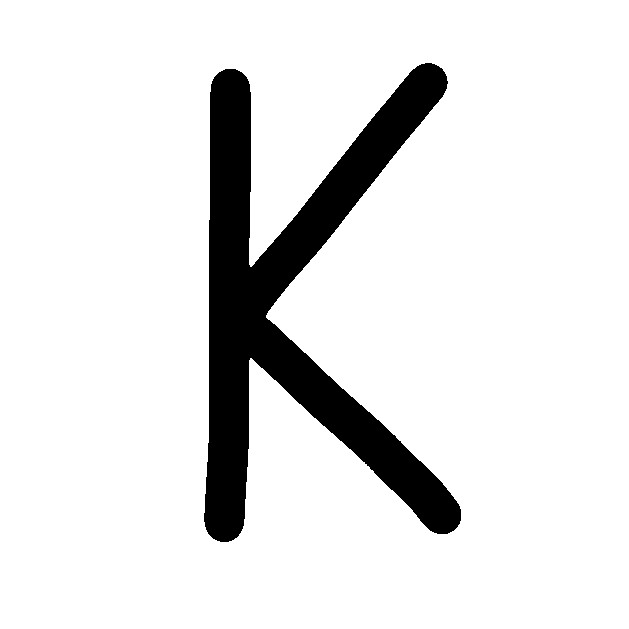

In [4]:
from PIL import Image
user_test = '/Users/puravgupta/Downloads/K.png'
col = Image.open(user_test)
gray = col.convert('L')
bw = gray.point(lambda x: 0 if x<100 else 255, '1')
bw.save("/Users/puravgupta/Downloads/bw_image.jpg")
bw

395641


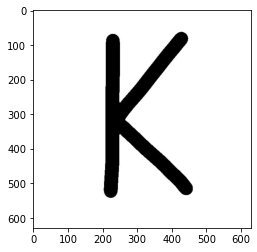

In [5]:
img_array = cv2.imread("/Users/puravgupta/Downloads/bw_image.jpg", cv2.IMREAD_GRAYSCALE)
img_array = cv2.bitwise_not(img_array)
print(img_array.size)
plt.imshow(img_array, cmap = plt.cm.binary)
plt.show()

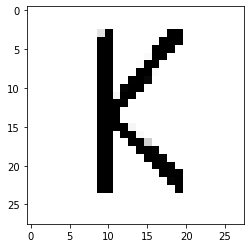

In [6]:
img_size = 28
new_array = cv2.resize(img_array, (img_size,img_size))
plt.imshow(new_array, cmap = plt.cm.binary)
plt.show()

In [7]:
new_array = np.expand_dims(new_array, axis=0)
user_test = tf.keras.utils.normalize(new_array, axis = 1)

In [8]:
characters = ['0','1','2','3','4','5','6','7','8','9',
'A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z',
'a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z']

In [9]:
predicted = reloaded.predict([[user_test]])
a = predicted[0][0]
for i in range(0,62):
  b = predicted[0][i]
  print("Probability Distribution for",i,b)

print("The Predicted Value is",characters[np.argmax(predicted[0])])


Probability Distribution for 0 2.5140157e-13
Probability Distribution for 1 1.2684079e-10
Probability Distribution for 2 1.7748944e-10
Probability Distribution for 3 4.0962156e-12
Probability Distribution for 4 9.333899e-08
Probability Distribution for 5 1.7343266e-09
Probability Distribution for 6 4.6838804e-09
Probability Distribution for 7 4.8837384e-10
Probability Distribution for 8 3.1076405e-10
Probability Distribution for 9 4.1685587e-12
Probability Distribution for 10 8.217259e-08
Probability Distribution for 11 6.8639476e-09
Probability Distribution for 12 1.07619184e-10
Probability Distribution for 13 6.849073e-11
Probability Distribution for 14 2.5024454e-07
Probability Distribution for 15 3.0286157e-07
Probability Distribution for 16 6.315089e-08
Probability Distribution for 17 7.477117e-07
Probability Distribution for 18 4.763012e-10
Probability Distribution for 19 1.1883468e-10
Probability Distribution for 20 0.99974924
Probability Distribution for 21 1.9878962e-08
Probab

2022-02-20 20:01:15.388379: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-02-20 20:01:15.420984: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


## Import tensorflowjs and then convert the model to .json file

In [12]:
import tensorflowjs as tfjs

In [13]:
tfjs.converters.save_keras_model(reloaded, "/Users/puravgupta/Jupyter Notebooks/EMNIST js file")